# EDA e análise de dados de crédito em SQL

#### Exercício para o módulo de SQL do curso EBAC cientista de dados

#### Dicionário de dados

|Campo| Descrição|
|------|-----------------|
|idade | idade do cliente|
|sexo | sexo do cliente (F ou M)|
|dependentes | número de dependentes do cliente|
|escolaridade | nível de escolaridade do clientes|
|salario_anual | faixa salarial do cliente|
|tipo_cartao | tipo de cartao do cliente|
|qtd_produtos | quantidade de produtos comprados nos últimos 12 meses|
|iteracoes_12m | quantidade de iterações/transacoes nos ultimos 12 meses|
|meses_inativo_12m | quantidade de meses que o cliente ficou inativo|
|limite_credito | limite de credito do cliente|
|valor_transacoes_12m | valor das transações dos ultimos 12 meses|
|qtd_transacoes_12m | quantidade de transacoes dos ultimos 12 meses|

# Exploratory data analysis (EDA)

#### **QUAL O NÚMERO TOTAL DE REGISTROS NO BANCO DE DADOS?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT COUNT(*) FROM credito

**<span style="color: grey">RESULTADO<span>**

*2.564 registros*

---

#### **EXEMPLO DOS DADOS<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT * FROM credito LIMIT 5

**<span style="color: grey">RESULTADO<span>**

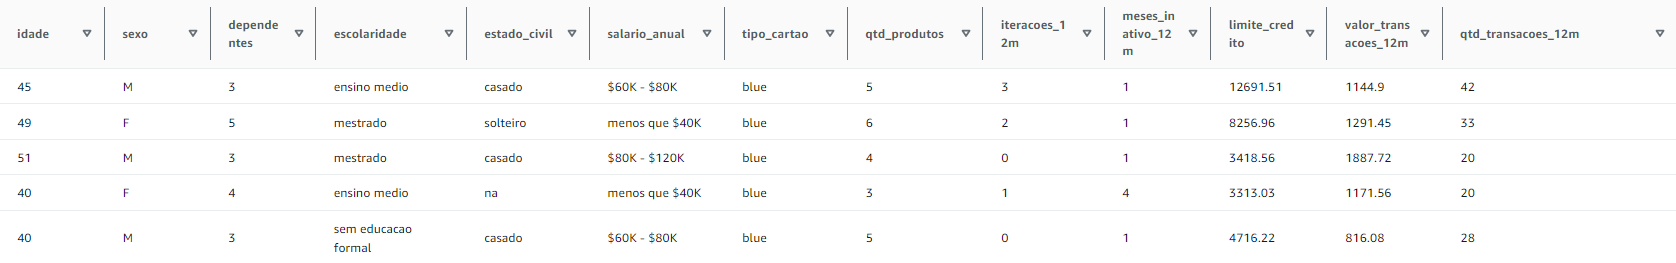

---

#### **TIPOS DE DADOS<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
DESCRIBE credito

**<span style="color: grey">RESULTADO<span>**

|Coluna                 |Tipo|
|-----------------------|----|
|idade               	|int|                 	                    
|sexo                	|string|
|dependentes         	|int|             	                    
|escolaridade        	|string|
|estado_civil        	|string|             	                    
|salario_anual       	|string|             	                    
|tipo_cartao         	|string|             	                    
|qtd_produtos        	|bigint|             	                    
|iteracoes_12m       	|int|             	                    
|meses_inativo_12m   	|int|                	                    
|limite_credito      	|float|
|valor_transacoes_12m	|float|              	                    
|qtd_transacoes_12m  	|int|

---

#### **VALORES MÍNIMOS, MÁXIMOS E ÚNICOS<span>**

**<span style="color: grey">CONSULTAS</span>**

```sql
idade
SELECT MIN(idade) as "Idade Mínima", MAX(idade) as "Idade Máxima" FROM credito

sexo
SELECT DISTINCT sexo FROM credito

dependentes
SELECT MIN(dependentes) as "Dependentes Mínimo", MAX(dependentes) as "Dependentes Máximo" FROM credito

escolaridade
SELECT DISTINCT escolaridade FROM credito

estado_civil
SELECT DISTINCT estado_civil FROM credito

salario_anual
SELECT DISTINCT salario_anual FROM credito

tipo_cartao
SELECT DISTINCT tipo_cartao FROM credito

qtd_produtos
SELECT MIN(qtd_produtos) as "Qtde. Produtos Mínimo", MAX(qtd_produtos) as "Qtde. Produtos Máximo" FROM credito

iteracoes_12m
SELECT MIN(iteracoes_12m) as "Iterações Mínimo", MAX(iteracoes_12m) as "Iterações Máximo" FROM credito

meses_inativo_12m
SELECT MIN(meses_inativo_12m) as "Inativo Mínimo", MAX(meses_inativo_12m) as "Inativo Máximo" FROM credito

limite_credito
SELECT MIN(limite_credito) as "Limite Mínimo", MAX(limite_credito) as "Limite Máximo" FROM credito

valor_transacoes_12m
SELECT MIN(valor_transacoes_12m) as "Valor Transações Mínimo", MAX(valor_transacoes_12m) as "Valor Transações Máximo" FROM credito

qtd_transacoes_12m
SELECT MIN(qtd_transacoes_12m) as "Qtde. Transações Mínimo", MAX(qtd_transacoes_12m) as "Qtde. Transações Máximo" FROM credito

**<span style="color: grey">RESULTADOS<span>**

idade
|            |  |
|------------|--|
|Idade Mínima|26|
|Idade Máxima|73|

sexo
|            |
|------------|
|F|
|M|

dependetes
|            |  |
|------------|--|
|Dependentes Mínimo|0|
|Dependentes Máximo|5|

escolaridade
|            |
|------------|
|sem educacao formal|
|mestrado|
|graduacao|
|doutorado|
|na|
|ensino medio|

estado_civil
|            |
|------------|
|divorciado| 
|casado| 
|solteiro| 
|na|

salario_anual
|            |
|------------|
|$60K - $80K|
|$40K - $60K|
|$120K +|
|$80K - $120K|
|menos que $40K|
|na|

tipo_cartao
|            |
|------------|
|silver|
|platinum|
|blue|
|gold|

qtd_produtos
|            |  |
|------------|--|
|Qtde. Produtos Mínimo|1|
|Qtde. Produtos Máximo|6|

iteracoes_12m
|            |  |
|------------|--|
|Iterações Mínimo|0|
|Iterações Máximo|5|

meses_inativo_12m
|            |  |
|------------|--|
|Inativo Mínimo|0|
|Inativo Máximo|6|

limite_credito
|            |  |
|------------|--|
|Limite Mínimo|1438.03|
|Limite Máximo|34516.99|

valor_transacoes_12m
|            |  |
|------------|--|
|Valor Transações Mínimo|510.16|
|Valor Transações Máximo|4776.58|

qtd_transacoes_12m
|            |  |
|------------|--|
|Qtde. Transações Mínimo|10|
|Qtde. Transações Máximo|103|

---

# Data analysis

#### **QUAL O VALOR MÉDIO DAS TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR FAIXA ETÁRIA?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
WITH idade_ranges AS (
    SELECT
        idade,
        CASE
            WHEN idade BETWEEN 26 AND 41 THEN '26-41'
            WHEN idade BETWEEN 42 AND 56 THEN '42-56'
            WHEN idade >= 57 THEN '57-73'
        END AS idade_range,
        valor_transacoes_12m
    FROM credito
)
SELECT
    idade_range,
    AVG(valor_transacoes_12m)
FROM idade_ranges
GROUP BY idade_range
ORDER BY idade_range

**<span style="color: grey">RESULTADO<span>**

|Faixa etária|Valor médio|
|------------|--|
|26-41| 2075.152|
|42-56| 1683.5591|
|57-73| 1639.663|

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Quanto maior a faixa etária menor o valor médio nos últimos 12 meses</span>*

---

#### **QUAL O NÚMERO DE TRANSAÇÕES MÉDIA NOS ÚLTIMOS 12 MESES POR FAIXA ETÁRIA?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
WITH idade_ranges AS (
    SELECT
        idade,
        CASE
            WHEN idade BETWEEN 26 AND 41 THEN '26-41'
            WHEN idade BETWEEN 42 AND 56 THEN '42-56'
            WHEN idade >= 57 THEN '57-73'
        END AS idade_range,
        qtd_transacoes_12m
    FROM credito
)
SELECT
    idade_range,
    AVG(qtd_transacoes_12m)
FROM idade_ranges
GROUP BY idade_range
ORDER BY idade_range

**<span style="color: grey">RESULTADO<span>**

|Faixa etária|Transações média|
|------------|--|
|26-41| 46.72127659574468|
|42-56| 39.06519967400163|
|57-73| 37.9823677581864|

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Quanto maior a faixa etária menor o número de transações média nos últimos 12 meses</span>*

---

#### **QUAL O VALOR MÉDIO DAS TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR SEXO?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT sexo, AVG(valor_transacoes_12m) FROM credito GROUP BY sexo

**<span style="color: grey">RESULTADO<span>**

|Sexo|Valor médio|
|------------|--|
|F| 1839.6226|
|M| 1807.968|

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Sexo masculino tende a gasta menos que sexo feminino, por uma diferença pouco relevante</span>*

---

#### **QUAL O NÚMERO DE TRANSAÇÕES MÉDIA NOS ÚLTIMOS 12 MESES POR SEXO?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT sexo, AVG(qtd_transacoes_12m) FROM credito GROUP BY sexo

**<span style="color: grey">RESULTADO<span>**

|Sexo|Valor médio|
|------------|--|
|F| 42.28371628371628|
|M| 41.333333333333336|

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Sexo masculino tende a realizar menos transações que sexo feminino, por uma diferença pouco relevante</span>*

---

#### **QUAL O VALOR MÉDIO E QUANTIDADE DE TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR ESCOLARIDADE?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT escolaridade, AVG(valor_transacoes_12m) AS valor_12m, AVG(qtd_transacoes_12m) AS qtde_12m FROM credito GROUP BY escolaridade

**<span style="color: grey">RESULTADO<span>**

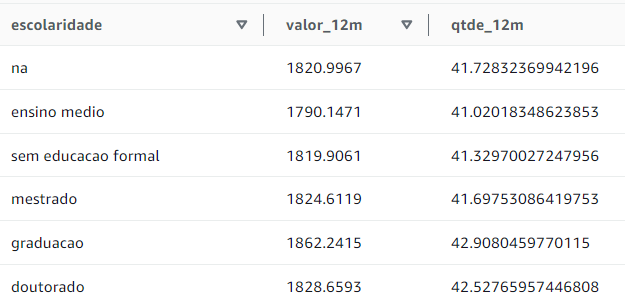

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Clientes com escolaridade ensino médio tendem a gastar menos que demais niveis escolares</span>*

---

#### **QUAL O VALOR MÉDIO E QUANTIDADE DE TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR FAIXA SALARIAL?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT salario_anual, AVG(valor_transacoes_12m) AS valor_12m, AVG(qtd_transacoes_12m) AS qtde_12m FROM credito GROUP BY salario_anual ORDER BY valor_12m

**<span style="color: grey">RESULTADO<span>**

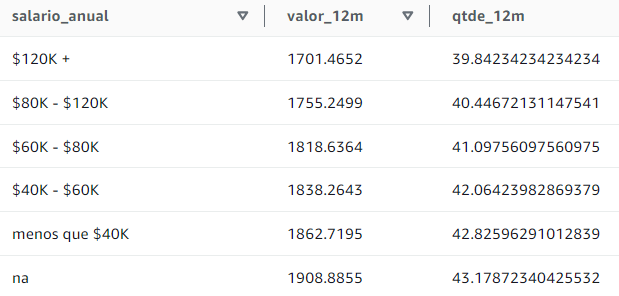

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Clientes das faixas salariais acima de 80k gastaram menos nos últimos 12 meses e realizaram menos transações</span>*

---

#### **QUAL O VALOR MÉDIO E QUANTIDADE DE TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR TIPO DE CARTÃO?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
SELECT tipo_cartao, AVG(valor_transacoes_12m) AS valor_12m, AVG(qtd_transacoes_12m) AS qtde_12m FROM credito GROUP BY tipo_cartao ORDER BY valor_12m

**<span style="color: grey">RESULTADO<span>**

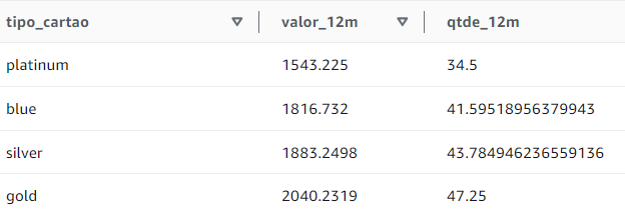

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Clientes da bandeira platinum são os que menos gastam em relaçao as demais bandeiras</span>*

---

#### **QUAL O VALOR MÉDIO E QUANTIDADE DE TRANSAÇÕES NOS ÚLTIMOS 12 MESES POR LIMITE DE CRÉDITO?<span>**

**<span style="color: grey">CONSULTA</span>**

```sql
WITH limites AS (
    SELECT
        limite_credito,
        CASE
            WHEN limite_credito BETWEEN 1400.0 AND 4760.0 THEN '1.400 - 4.760'
            WHEN limite_credito BETWEEN 4760.001 AND 8120.0 THEN '4.761 - 8.120'
            WHEN limite_credito BETWEEN 8120.001 AND 11480.0 THEN '8.121 - 11.480'
            WHEN limite_credito BETWEEN 11480.001 AND 14840.0 THEN '11.481 - 14.840'
            WHEN limite_credito BETWEEN 14840.001 AND 18200.0 THEN '14.841 - 18.200'
            WHEN limite_credito BETWEEN 18200.001 AND 21560.0 THEN '18.201 - 21.560'
            WHEN limite_credito BETWEEN 21560.001 AND 24920.0 THEN '21.561 - 24.920'
            WHEN limite_credito BETWEEN 24920.001 AND 28280.0 THEN '24.921 - 28.280'
            WHEN limite_credito BETWEEN 28280.001 AND 31640.0 THEN '28.281 - 31.640'
            WHEN limite_credito >= 31641.0 THEN '31.641 - 35.000'
        END AS limite_credito_range,
        valor_transacoes_12m,
        qtd_transacoes_12m
    FROM credito
)
SELECT
    limite_credito_range,
    AVG(valor_transacoes_12m) AS valor_12m,
    AVG(qtd_transacoes_12m) AS qtde_12m
FROM limites
GROUP BY limite_credito_range
ORDER BY valor_12m

**<span style="color: grey">RESULTADO<span>**

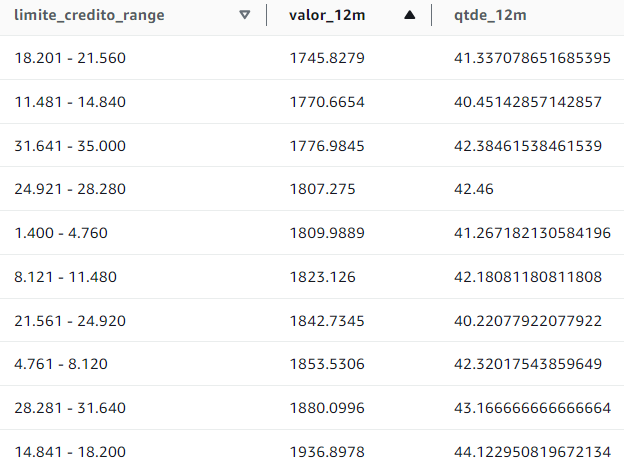

**<span style="color: grey">INSIGHT<span>**

*<span style="color: orange">Clientes com limite de crédito das faixas 18.201 - 21.560, 11.481 - 14.840 e 31.641 - 35.000 são os que menos gastam considerando o histórico de 12 meses</span>*